In [1]:
import numpy as np
import pandas as pd 
from sklearn.linear_model import Ridge, LinearRegression, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df= pd.read_table("TP_1_prostate_dataset.txt", index_col="col")
df

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
col,,,,,,,,,,
1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T
...,...,...,...,...,...,...,...,...,...,...
93,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147,T
94,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443,T
95,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124,F


In [3]:
print(df.isna().sum().sum())
print(df.duplicated().sum())

0
0


In [4]:
colonnes= df.columns
x= df[[col for col in colonnes if col not in ["train", "lpsa", "pgg45"]]].values
y= df["lpsa"].values

In [5]:
#standardization
st= StandardScaler()
st_scale= st.fit(x)
x_scale= st_scale.transform(x)

In [6]:
xtrain, xtest, ytrain, ytest= train_test_split(x_scale, y, test_size=0.25)
xtrain.shape

(72, 7)

In [7]:
lr= LinearRegression()
lr.fit(xtrain, ytrain)
ypred= lr.predict(xtest)
baseline_error= np.mean((ypred-ytest)**2)
print(baseline_error)

0.2743565273298099


In [8]:
n_alphas=50
alphas= np.logspace(-5, 5, n_alphas)
error=[]
coefs=[]
for a in alphas:
    r= Ridge(alpha= a)
    r.fit(xtrain, ytrain)
    coefs.append(r.coef_)
    error.append(np.mean((r.predict(xtest)- ytest)**2))
    

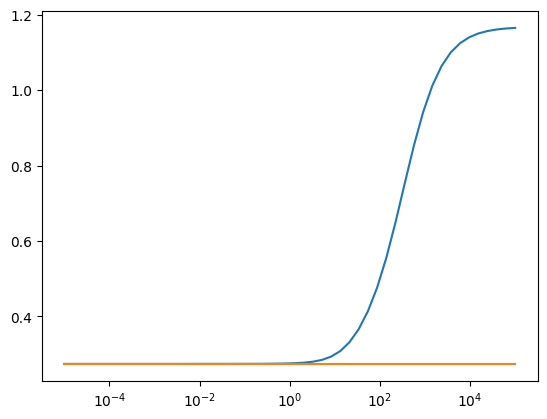

In [9]:
ax= plt.gca()

ax.plot(alphas, error, [10**-5, 10**5], [baseline_error]*2)
ax.set_xscale("log")
plt.show()

In [10]:
#index de l'erreur minimum
idx=np.argmin(error)
#sa valeur
mini=error[idx]
# valeur de alpha correspondant
alphas[idx]

1e-05

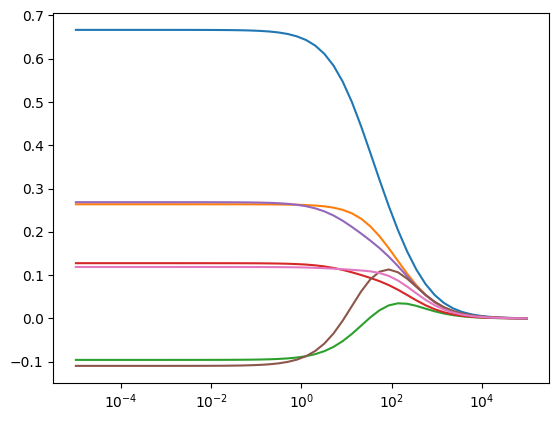

In [11]:
ax= plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.show()

In [12]:
n_alphas=50
alphas= np.logspace(-5, 5, n_alphas)
errors=[]
coefs=[]
for a in alphas:
    ls= Lasso(alpha= a)
    ls.fit(xtrain, ytrain)
    coefs.append(ls.coef_)
    errors.append(np.mean((ls.predict(xtest)- ytest)**2))

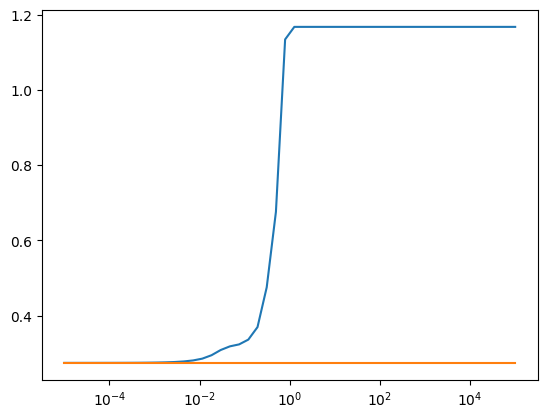

In [13]:
ax2= plt.gca()
ax2.plot(alphas, errors, [10**-5, 10**5], [baseline_error]*2)
ax2.set_xscale("log")
plt.show()

In [14]:
#erreur min
err= errors[np.argmin(errors)]
err

0.27436429092166426

In [15]:
alphas[np.argmin(errors)]


1e-05

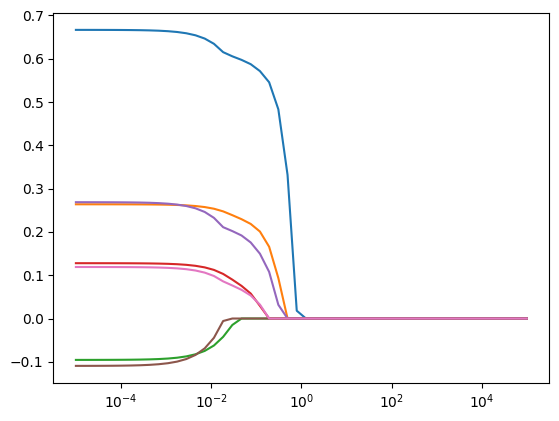

In [16]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.show()
